In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(genomation)
library(GenomicRanges)
library(Matrix)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDupl

In [2]:
obj.seurat = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/2.merge_peaks.240624/obj.seurat.rds")

In [3]:
list.rna_detected_percent.5 = lapply(c("B","DC","Mono","NK","T"),
                                     function(cell_type) {
                                         matrix.rna = obj.seurat@assays$RNA$counts[,!is.na(obj.seurat$cell_type) &
                                                                                   obj.seurat$cell_type == cell_type]
                                         rna_detected_percent = rowSums(matrix.rna) / ncol(matrix.rna)
                                         rna_detected_percent
                                     })

In [4]:
df.rna_detected_percent.5 = do.call(cbind,list.rna_detected_percent.5)
df.rna_detected_percent.5 = as.data.frame(df.rna_detected_percent.5)
colnames(df.rna_detected_percent.5) = c("B","DC","Mono","NK","T")

In [5]:
df.rna_detected_percent.5

,B,DC,Mono,NK,T
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L2,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000
DDX11L1,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000
WASH7P,0.004508566,0.013245033,0.0082778114,0.010335917,0.0038931643
MIR6859-1,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000
MIR1302-2HG,0.000000000,0.000000000,0.0002018978,0.000000000,0.0000000000
MIR1302-2,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000
FAM138A,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000
OR4G4P,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000
ENSG00000290826,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000


In [6]:
table(df.rna_detected_percent.5[,1] > 0.01)


FALSE  TRUE 
49205 13552 

In [7]:
df.rna_detected_percent.5.bi = df.rna_detected_percent.5 > 0.01
df.rna_detected_percent.5.bi

,B,DC,Mono,NK,T
DDX11L2,FALSE,FALSE,FALSE,FALSE,FALSE
DDX11L1,FALSE,FALSE,FALSE,FALSE,FALSE
WASH7P,FALSE,TRUE,FALSE,TRUE,FALSE
MIR6859-1,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2HG,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2,FALSE,FALSE,FALSE,FALSE,FALSE
FAM138A,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G4P,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000290826,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G11P,FALSE,FALSE,FALSE,FALSE,FALSE


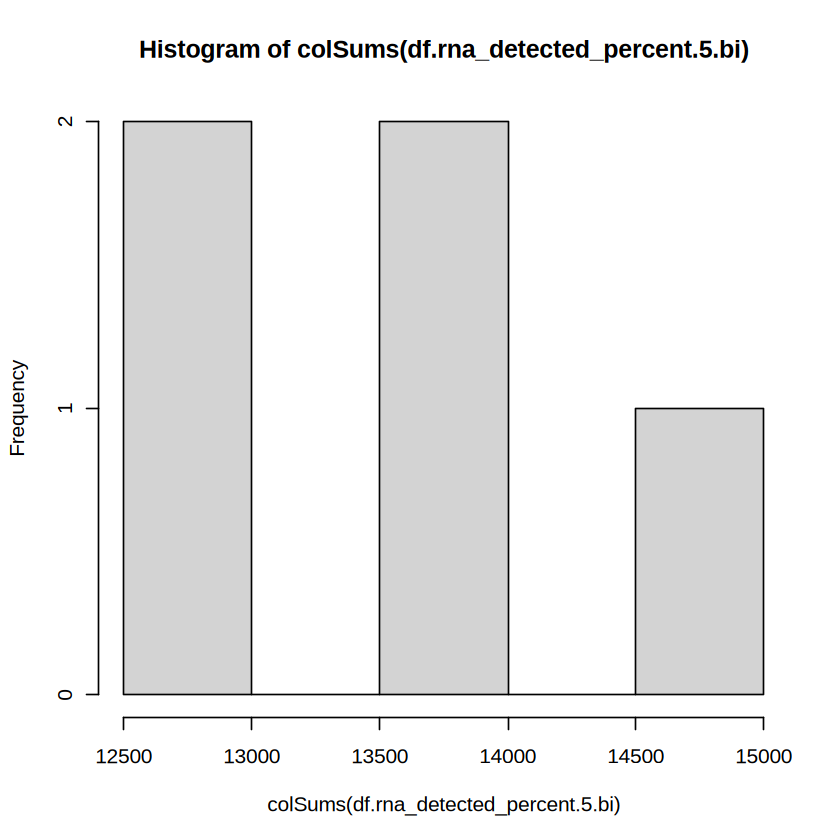

In [8]:
hist(colSums(df.rna_detected_percent.5.bi))

In [10]:
dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.define_detected_gene_peak.240629",recursive = T)

In [11]:
write.csv(df.rna_detected_percent.5,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.define_detected_gene_peak.240629/df.rna_detected_percent.5.csv")

In [12]:
write.csv(df.rna_detected_percent.5.bi,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.define_detected_gene_peak.240629/df.rna_detected_percent.5.bi.csv")

In [13]:
dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.define_detected_gene_peak.240629/peaks_PBMC",recursive = T)

In [14]:
for (cell_type in c("B","DC","Mono","NK","T")) {
    bed.peaks = readGeneric(paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240617/sc-E2G/test/results/PBMC/",
                                  cell_type,
                                  ".multiome_7features/Kendall/Pairs.tsv.gz",
                                  sep = ""),
                            header = T)
    bed.peaks = reduce(bed.peaks)

    write.table(as.data.frame(bed.peaks)[,1:3],
            paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.define_detected_gene_peak.240629/peaks_PBMC/",
                  cell_type,
                  ".bed",
                  sep = ""),
            sep = "\t",
            row.names = F,
            col.names = F,
            quote = F)
}

In [15]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.5.1        Matrix_1.6-5         GenomicRanges_1.54.1
 [4] GenomeInfoDb_1.38.1  IRanges_2.36.0       S4Vectors_0.40.2   